In [4]:
import pandas as pd


In [5]:
data = pd.read_csv("Corona_NLP_train.csv", encoding="latin-1")


In [6]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
print("number of rows in data:{}".format(data.shape[0]))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
data["Location"].value_counts(ascending=False)

Location
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: count, Length: 12220, dtype: int64

In [10]:
data["Sentiment"].value_counts(ascending=False)

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

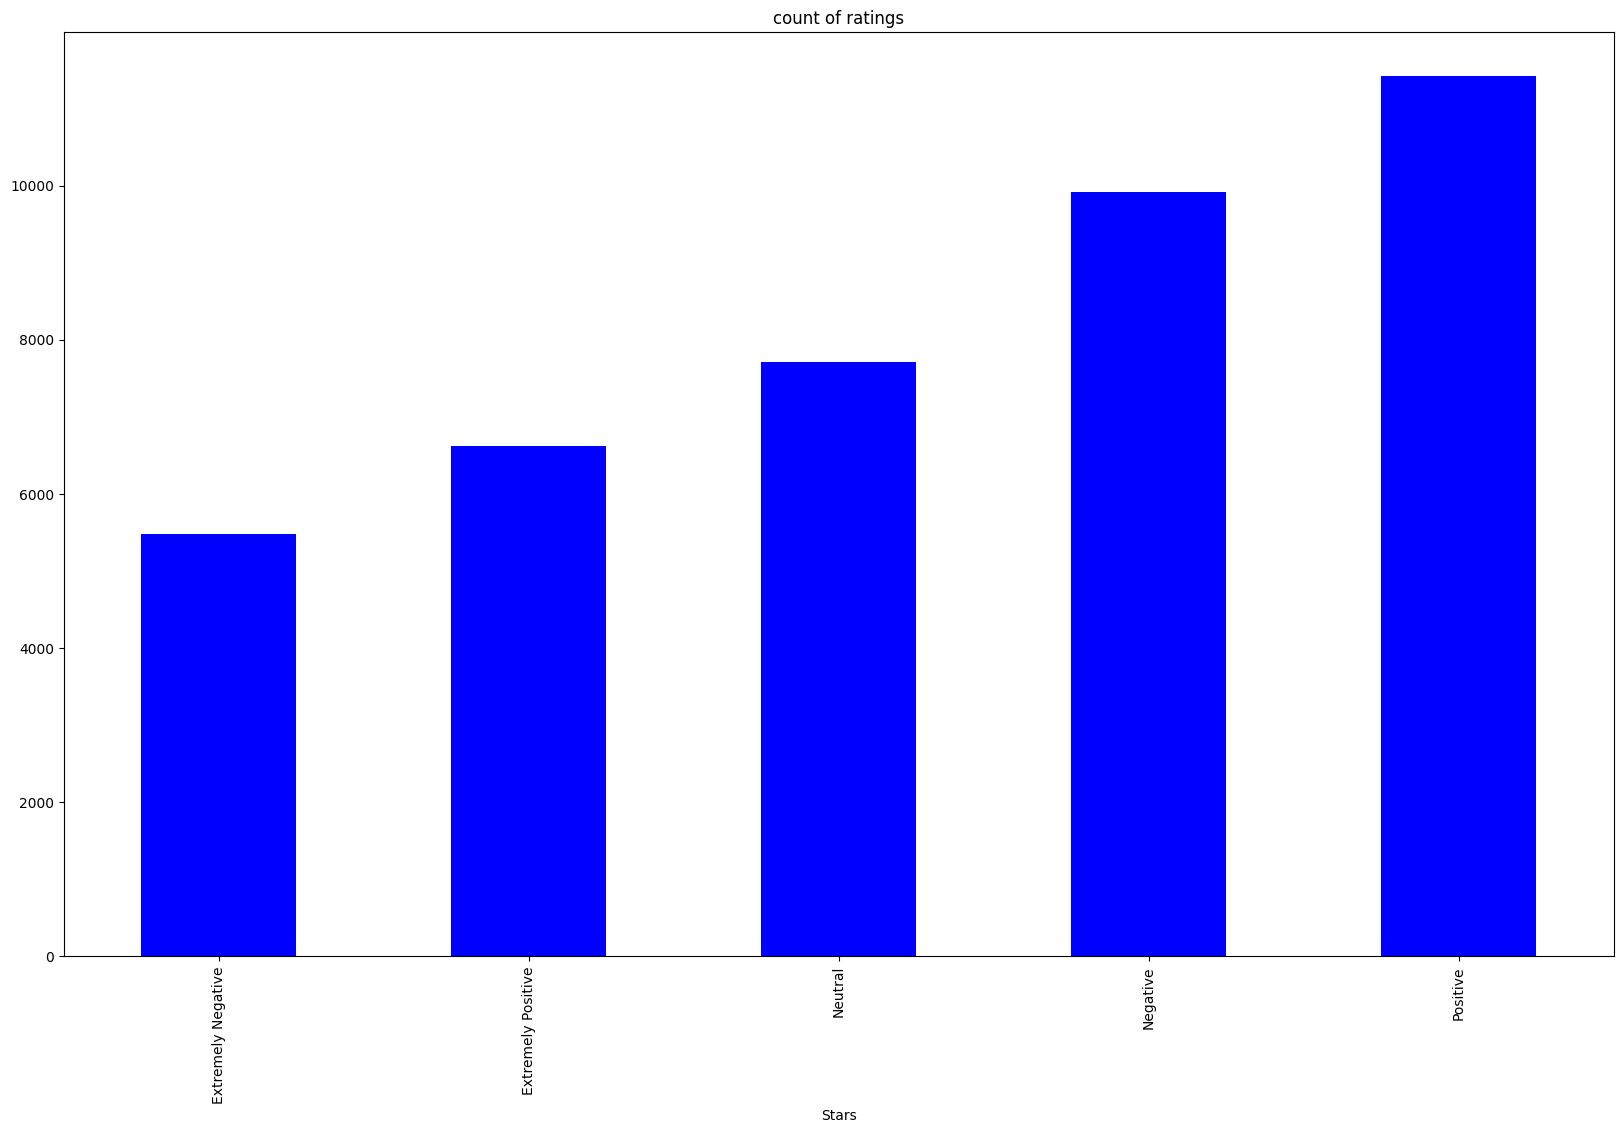

In [13]:
import matplotlib.pyplot as plt
data["Sentiment"].value_counts(ascending=True).plot(kind="bar",title="count of ratings",figsize=(20,12), color="Blue", xlabel="Stars")
plt.show



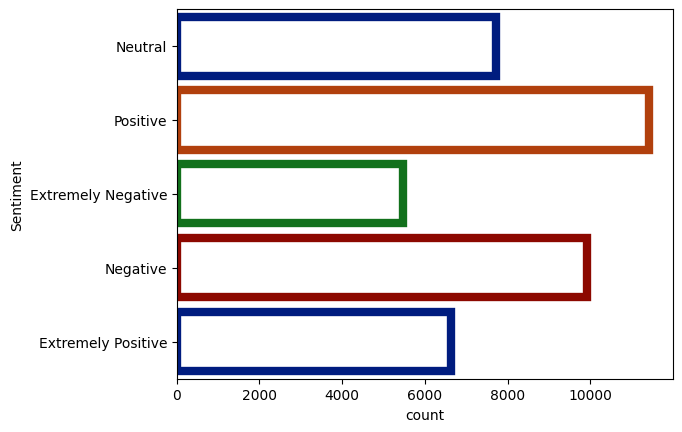

In [15]:
import seaborn as sns
sns.countplot(y="Sentiment", data= data, facecolor=(1,1,1,1), linewidth=6, edgecolor = sns.color_palette("dark",4))
plt.show()

In [16]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [17]:
data.drop(data.columns[[0,1,2,3]], axis=1, inplace=True)

In [18]:
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [19]:
data.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [21]:
data.duplicated().sum()

0

In [22]:
blanks=[]
for index in data["OriginalTweet"]:
    if index.isspace()==True:
        blanks.append(index)

In [23]:
print(blanks)

[]


In [24]:
x= data["OriginalTweet"]
y= data["Sentiment"]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [28]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
textclf= Pipeline([("tfidf", TfidfVectorizer()), ("clf",LinearSVC())])

In [32]:
textclf.fit(x_train, y_train)

c:\Users\Ankita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
preds = textclf.predict(x_test)

In [36]:
print(accuracy_score(y_test, preds))

0.548372846414372


In [37]:
cm= confusion_matrix(y_test, preds)
print(cm)

[[1087   19  584   53   77]
 [  13 1403   74   46  667]
 [ 632  111 1473  395  647]
 [  47   46  362 1595  492]
 [  97  771  553  448 1890]]


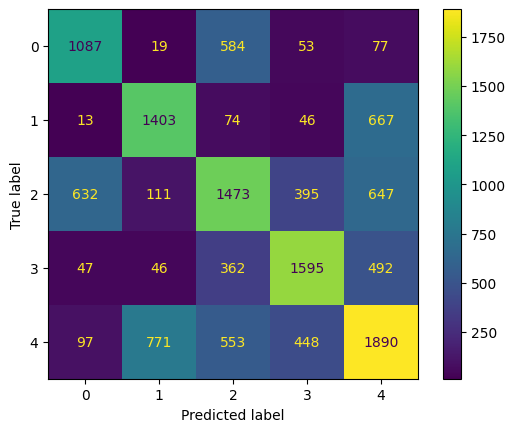

In [38]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [39]:
newtweet=[("I'm really happy in the covid process. I hope we will work remotely after pandemic")]

In [40]:
textclf.predict(newtweet)

array(['Extremely Positive'], dtype=object)